In [25]:
import os
import numpy as np
import pandas as pd
# pkl compressed file
import pickle   
import quandl

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import chart_studio
import chart_studio.plotly as cs_py

from setting import quandl_api_key, plotly_user, plotly_api_key

In [27]:
quandl.ApiConfig.api_key = quandl_api_key

In [3]:
# define a function to load the data from cache or acquire data if cache does not exist
def get_quandl_data(quandl_code):
    cache_path = '{}.pkl'.format(quandl_code).replace('/', '-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)
        print('Loaded {} from cache'.format(quandl_code))
    except (OSError, IOError) as e:
        df = quandl.get(quandl_code, returns='pandas')
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_code, cache_path))
    return df

In [4]:
btc_usd_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Loaded BCHARTS/KRAKENUSD from cache


In [5]:
btc_usd_kraken.head()

Open       High        Low      Close  Volume (BTC)  \
Date                                                                   
2014-01-07  874.67040  892.06753  810.00000  810.00000     15.622378   
2014-01-08  810.00000  899.84281  788.00000  824.98287     19.182756   
2014-01-09  825.56345  870.00000  807.42084  841.86934      8.158335   
2014-01-10  839.99000  857.34056  817.00000  857.33056      8.024510   
2014-01-11  858.20000  918.05471  857.16554  899.84105     18.748285   

            Volume (Currency)  Weighted Price  
Date                                           
2014-01-07       13151.472844      841.835522  
2014-01-08       16097.329584      839.156269  
2014-01-09        6784.249982      831.572913  
2014-01-10        6780.220188      844.938794  
2014-01-11       16698.566929      890.671709

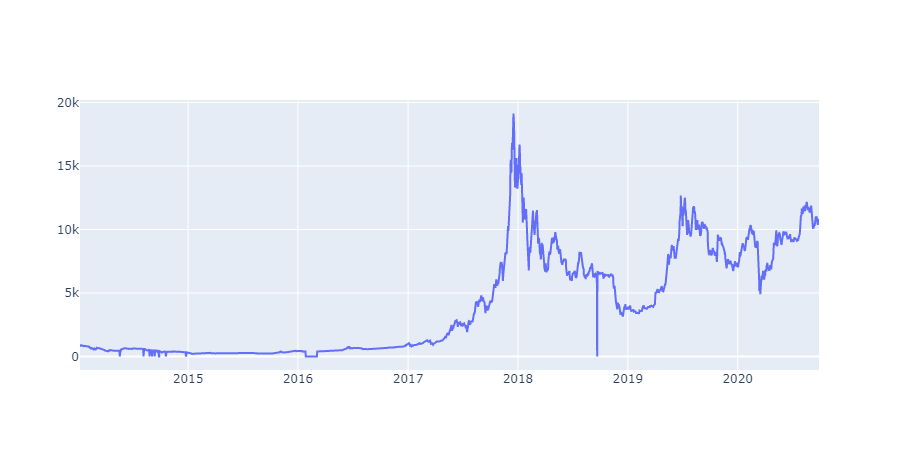

In [6]:
btc_trace = go.Scatter(x=btc_usd_kraken.index, y=btc_usd_kraken['Weighted Price'])
#print(btc_trace)
py.iplot([btc_trace])

In [7]:
# getting datat from multiple exchanges
exchanges = ['COINBASE', 'BITSTAMP', 'ITBIT']

exchange_data = {}
exchange_data['KRAKEN'] = btc_usd_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTs/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Loaded BCHARTs/COINBASEUSD from cache
Loaded BCHARTs/BITSTAMPUSD from cache
Loaded BCHARTs/ITBITUSD from cache


In [8]:
def merge_dfs(dataframes, labels, col):
    series_dict = {}
    
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
    return pd.DataFrame(series_dict)

In [9]:
btc_usd_df = merge_dfs(list(exchange_data.values()), list(exchange_data.keys()), 'Weighted Price')

In [10]:
btc_usd_df.tail()

KRAKEN  COINBASE      BITSTAMP  ITBIT
Date                                                   
2020-09-23  10373.404005       NaN  10379.157723    NaN
2020-09-24  10505.625991       NaN  10505.462115    NaN
2020-09-25  10666.483039       NaN  10661.107541    NaN
2020-09-26  10725.881660       NaN  10723.272203    NaN
2020-09-27  10709.332462       NaN  10709.809980    NaN

['KRAKEN', 'COINBASE', 'BITSTAMP', 'ITBIT']


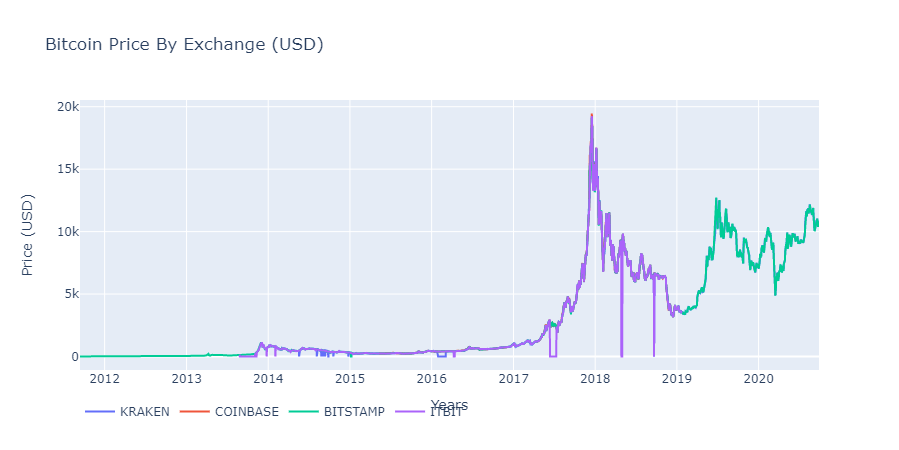

In [11]:
layout = go.Layout(
    title = "Bitcoin Price By Exchange (USD)",
    legend = {'orientation': 'h'},
    xaxis = {'type': 'date', "title": 'Years'},
    yaxis = {'title': 'Price (USD)'}
)


trace_arr = []
labels = list(btc_usd_df)
print(labels)

for index, label in enumerate(labels[:4]):
    series = btc_usd_df[label]
    trace = go.Scatter(x=series.index, y=series, name=label)
    trace_arr.append(trace)

fig1 = go.Figure(data=trace_arr, layout=layout)
py.iplot(fig1)

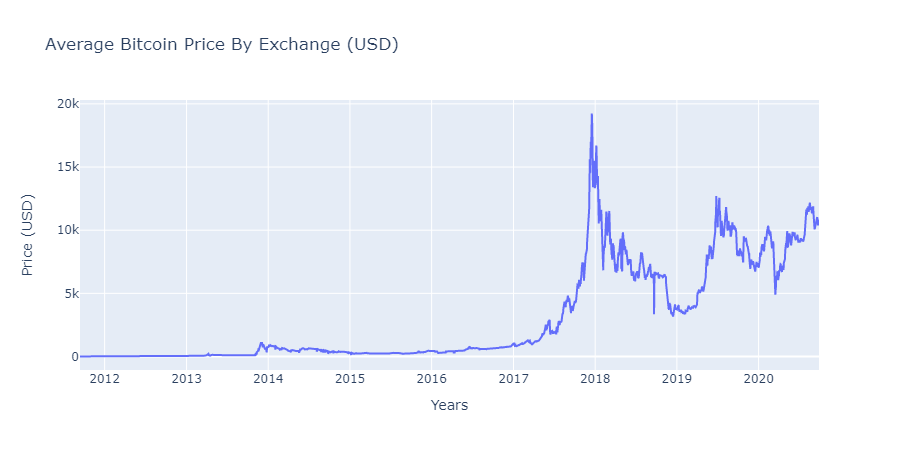

In [12]:
btc_usd_df['avg_usd_price'] = btc_usd_df.mean(axis=1)
btc_trace = go.Scatter(x=btc_usd_df.index, y=btc_usd_df['avg_usd_price'])
layout = go.Layout(
    title = "Average Bitcoin Price By Exchange (USD)",
    legend = {'orientation': 'h'},
    xaxis = {'type': 'date', "title": 'Years'},
    yaxis = {'title': 'Price (USD)'}
)
fig2 = go.Figure(data=btc_trace, layout=layout)
py.iplot(fig2)

In [28]:
chart_studio.tools.set_credentials_file(username=plotly_user, api_key=plotly_api_key)
cs_py.plot(fig2, filename='Bitcoin USD Price', auto_open=True)

'https://plotly.com/~victiny/1/'